## 1. Singular value decomposition

### a. High level codes

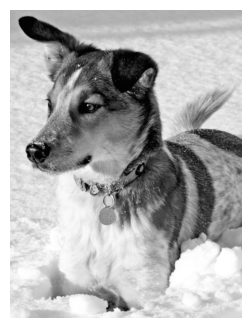

In [3]:
## imporing related modules

from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os

# Display input data
plt.rcParams['figure.figsize'] = [8, 4]

# data importing and preprocessing
A = imread(os.path.join('.','DATA','dog.jpg'))
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

#### 1. Singular Value Decomposition (SVD):

SVD decomposes a matrix $X$ into three separate matrices: $U$, $\Sigma$, and $V^T$, where $U$ contains the left singular vectors, $\Sigma$ is a diagonal matrix containing singular values, and $V^T$ contains the right singular vectors.

In the code, the SVD of a matrix $X$ is computed earlier, resulting in $U$, $\Sigma$, and $V^T$. Here's how these matrices are represented in the code:

- `U`: Left singular vectors of $X$.
- `S`: Diagonal matrix containing singular values of $X$.
- `VT`: Transpose of the right singular vectors of $X$.

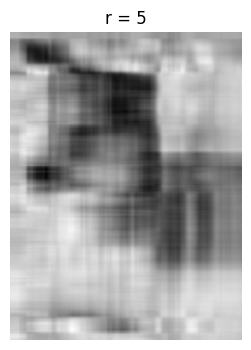

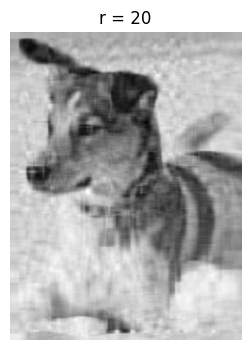

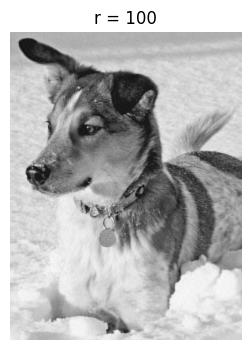

In [4]:
# SVD with numpy package 
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

#### 2. Truncated SVD:

Truncated SVD is an approximation of the original matrix $X$ using only the top $r$ singular values/vectors. The approximation $X_{\text{approx}}$ for a given rank $r$ is calculated using the following equation:
$$X_{\text{approx}} = U[:, :r] \times S[:r, :r] \times V^T[:r, :]$$

In the code:

- `U[:, :r]`: Selects the first $r$ columns of matrix $U$.
- `S[:r, :r]`: Selects the top-left $r \times r$ submatrix of the diagonal matrix $S$.
- `VT[:r, :]`: Selects the first $r$ rows of the transpose of matrix $V$.

The matrix multiplication `U[:, :r] @ S[:r, :r] @ VT[:r, :]` performs the approximation and calculates the approximate image $X_{\text{approx}}$ for the current rank $r$.

In [ ]:
# constructing truncated SVD

# use control flow to construct images with different r
j = 0

for r in (5, 20, 100):
    
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    
    j += 1
    # creating images here
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

Expression for the series of singular values ($\Sigma$):
$\text{np.diag}(S)$

Cumulative sum of singular values:
$\text{np.cumsum}(\text{np.diag}(S)) / \text{np.sum}(\text{np.diag}(S))$

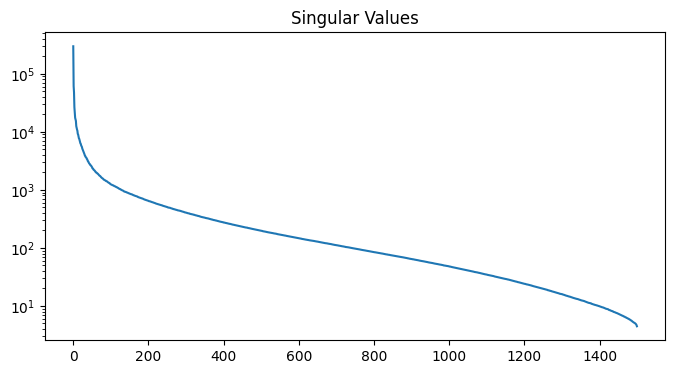

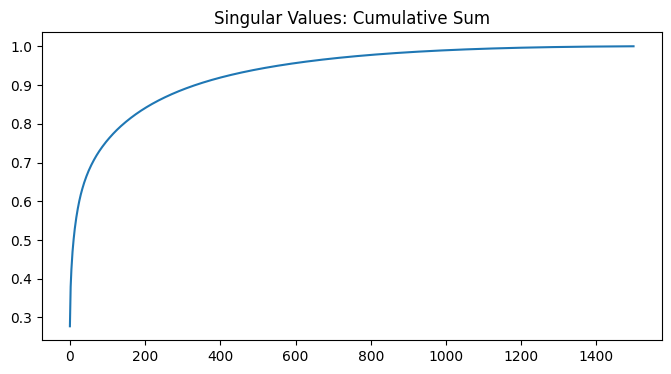

In [5]:
## plot singular values and cumulative sum of singular values

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

## 3. SVD on linear regression

The least squares solution $\tilde{x}$ for the linear regression problem can be expressed as:
$\tilde{x} = V^T \left( \Sigma^{-1} \right) U^T b$

Where:
- $\tilde{x}$ is the vector representing the coefficients of the regression line.
- $V^T$ is the transpose of the right singular matrix.
- $\Sigma^{-1}$ represents the inverse of the diagonal matrix $\Sigma$, obtained by taking the reciprocal of its non-zero elements.
- $U^T$ is the transpose of the left singular matrix.
- $b$ is the vector representing the noisy measurements.

This formula represents the mathematical expression of the least squares regression calculation using the singular value decomposition.

## Derivation

Given the SVD of matrix $A$:
$A = U \Sigma V^T$

Where:
- $A$ is the input data matrix,
- $U$ is the left singular matrix,
- $\Sigma$ is a diagonal matrix containing the singular values,
- $V^T$ is the transpose of the right singular matrix.

The linear regression problem can be formulated as finding coefficients $\mathbf{x}$ such that the residual sum of squares is minimized:
$\text{minimize} \, \| A\mathbf{x} - \mathbf{b} \|_2^2$

Expanding this, we get:
$\| A\mathbf{x} - \mathbf{b} \|_2^2 = (A\mathbf{x} - \mathbf{b})^T (A\mathbf{x} - \mathbf{b})$

Substituting $A = U \Sigma V^T$, we have:
$\| U \Sigma V^T \mathbf{x} - \mathbf{b} \|_2^2 = (U \Sigma V^T \mathbf{x} - \mathbf{b})^T (U \Sigma V^T \mathbf{x} - \mathbf{b})$

Expanding this further and using properties of orthogonal matrices (i.e., $U^T U = I$ and $V^T V = I$), we get:
$\| \Sigma V^T \mathbf{x} - U^T \mathbf{b} \|_2^2 = (\Sigma V^T \mathbf{x} - U^T \mathbf{b})^T (\Sigma V^T \mathbf{x} - U^T \mathbf{b})$

Let $\mathbf{y} = V^T \mathbf{x}$. Then, the problem becomes:
$\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2 = (\Sigma \mathbf{y} - U^T \mathbf{b})^T (\Sigma \mathbf{y} - U^T \mathbf{b})$

Expanding this expression, we have:
$\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2 = \sum_{i=1}^{n} (\sigma_i y_i - u_i^T \mathbf{b})^2$

where $\sigma_i$ are the singular values, and $u_i$ are the columns of $U$. The goal is to minimize this expression with respect to $\mathbf{y}$.

The solution to this problem is obtained by setting the derivative of $\| \Sigma \mathbf{y} - U^T \mathbf{b} \|_2^2$ with respect to $\mathbf{y}$ to zero. Solving the resulting equations gives the optimal values for $\mathbf{y}$.

Finally, once $\mathbf{y}$ is obtained, we can find $\mathbf{x}$ using $\mathbf{x} = V \mathbf{y}$.

This derivation shows how the least squares solution in linear regression can be derived using Singular Value Decomposition. The formula $\tilde{x} = V^T \left( \Sigma^{-1} \right) U^T \mathbf{b}$ represents the optimal coefficients for the regression line.

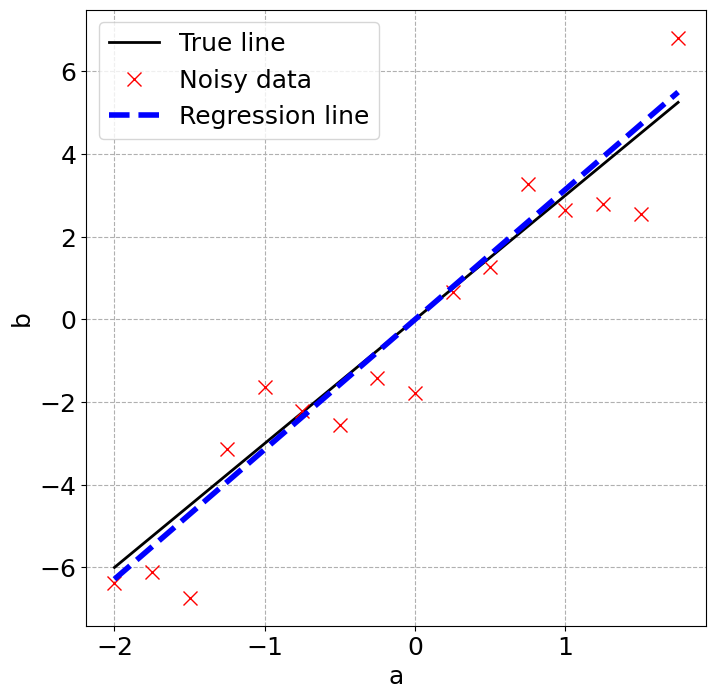

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

x = 3 # True slope
a = np.arange(-2,2,0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn(*a.shape) # Add noise

plt.plot(a, x*a, color='k', linewidth=2, label='True line') # True relationship
plt.plot(a, b, 'x', color='r', markersize = 10, label='Noisy data') # Noisy measurements

U, S, VT = np.linalg.svd(a,full_matrices=False)
xtilde = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b # Least-square fit

plt.plot(a,xtilde * a,'--',color='b',linewidth=4, label='Regression line')

plt.xlabel('a')
plt.ylabel('b')

plt.grid(linestyle='--')
plt.legend()
plt.show()
